In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# extracting the csv file
customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.corr(numeric_only = True)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [51]:
# Making sets for the data we can use to predict the output and the output
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [53]:
Y = customers['Yearly Amount Spent']

In [55]:
# Using model_selection.train_test_split from sklearn to split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [57]:
# Training the model with the help of the trained data we have separated
from sklearn.linear_model import LinearRegression

In [59]:
# creating an object of the Linear Regression class
model = LinearRegression()

In [61]:
model.fit(X_train, Y_train)

LinearRegression()

In [69]:
predictions = model.predict(X_test)

<Axes: xlabel='Yearly Amount Spent'>

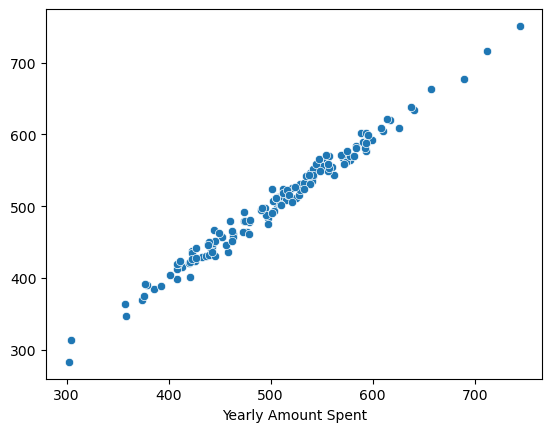

In [77]:
# plot to check for the variation between the Test values and the predicted values
sns.scatterplot(x =  Y_test, y = predictions)

In [79]:
# evaluating model performance
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test, predictions))
print(metrics.mean_squared_error(Y_test, predictions))
print(metrics.root_mean_squared_error(Y_test, predictions))

7.497099769329178
85.73937275442985
9.259555753621761


In [81]:
# to show the variance between the predicted scores and actual values
metrics.explained_variance_score(Y_test, predictions)

0.9851267382480683

In [83]:
# To find out whether they should work on their app or website, we make a dataframe for the coefficients of customers dataframe
pd.DataFrame(index = X.columns, data = model.coef_, columns = ['Coefficients'])

,Coefficients
Avg. Session Length,25.591110
Time on App,38.720733
Time on Website,0.881517
Length of Membership,61.634125


With the help of these coefficients we can understand that, the time spent on the app is much more than the time that is spent on the website.
This could be understood in two ways :
1. They should spend more time on their website trying to make it better and engage further
2. They should invest time in app and make it better because the app is engaging many more customers over the website